In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
paciente='paciente3'

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

5427

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

5427

In [9]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

384

In [11]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

384

In [13]:
with open('dataset/generado/'+paciente+'/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

3586

In [15]:
with open('dataset/generado/'+paciente+'/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

3586

In [17]:
array_Xtrain.shape

(5427, 30, 5)

In [18]:
array_Xval.shape

(384, 30, 5)

# Entrenamiento Vanilla LSTM con dropout

In [19]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [20]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_dropout_balanceado.h5')

Epoch 1/50
170/170 [==============================] - 8s 28ms/step - loss: 0.0207 - mae: 0.1067 - mse: 0.0207 - val_loss: 0.0064 - val_mae: 0.0640 - val_mse: 0.0064
Epoch 2/50
170/170 [==============================] - 3s 16ms/step - loss: 0.0109 - mae: 0.0765 - mse: 0.0109 - val_loss: 0.0051 - val_mae: 0.0561 - val_mse: 0.0051
Epoch 3/50
170/170 [==============================] - 4s 24ms/step - loss: 0.0084 - mae: 0.0668 - mse: 0.0084 - val_loss: 0.0040 - val_mae: 0.0475 - val_mse: 0.0040
Epoch 4/50
170/170 [==============================] - 4s 23ms/step - loss: 0.0075 - mae: 0.0625 - mse: 0.0075 - val_loss: 0.0052 - val_mae: 0.0536 - val_mse: 0.0052
Epoch 5/50
170/170 [==============================] - 4s 23ms/step - loss: 0.0067 - mae: 0.0593 - mse: 0.0067 - val_loss: 0.0048 - val_mae: 0.0519 - val_mse: 0.0048
Epoch 6/50
170/170 [==============================] - 4s 24ms/step - loss: 0.0062 - mae: 0.0565 - mse: 0.0062 - val_loss: 0.0036 - val_mae: 0.0430 - val_mse: 0.0036
Epoch 7/50

113/113 [==============================] - 2s 10ms/step - loss: 0.0056 - mae: 0.0563 - mse: 0.0056
test loss, test acc: [0.005580171477049589, 0.056250542402267456, 0.005580171477049589]


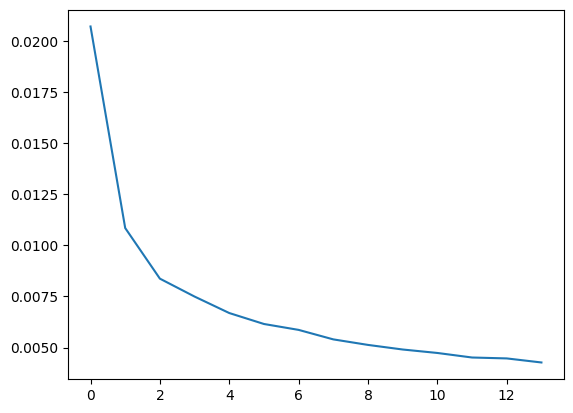

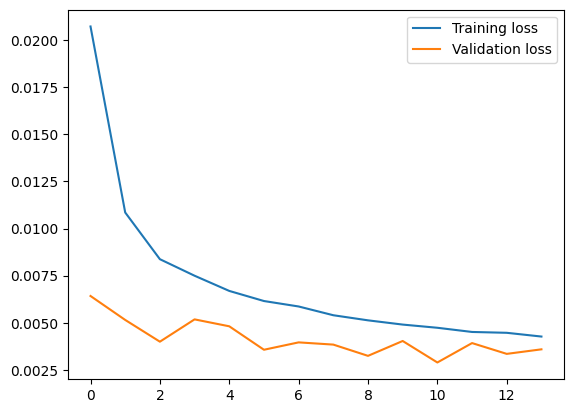

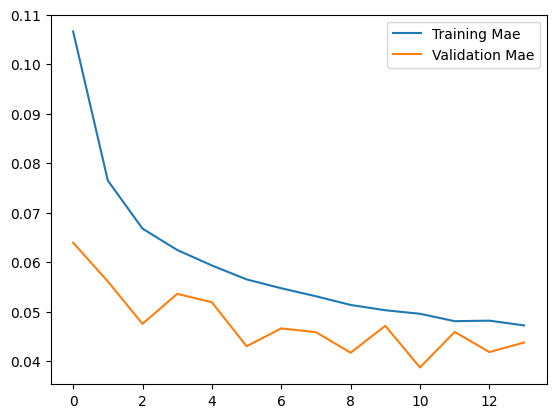

In [21]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 8ms/step


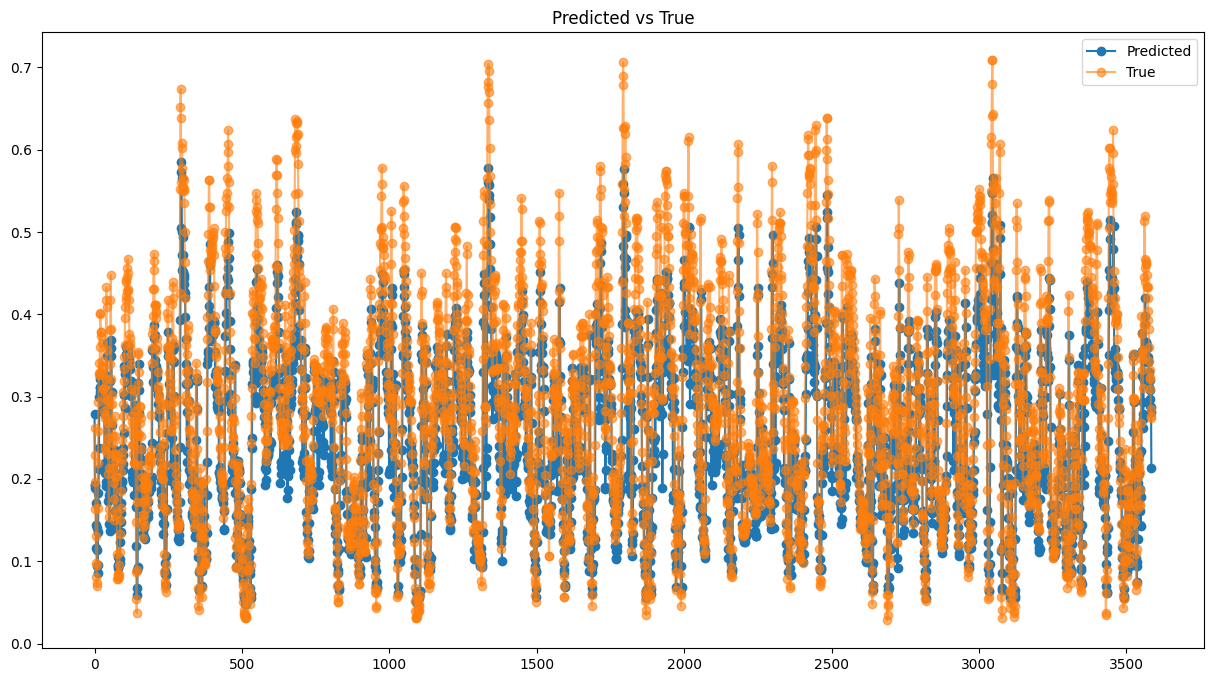

In [22]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [23]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05625053809463329,
 'mse': 0.07470053707540882,
 'rmse': 0.005580170239354526}

# Entrenamiento Vanilla LSTM sin dropout

In [24]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [25]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_NO_dropout_balanceado.h5')

Epoch 1/50
170/170 [==============================] - 7s 21ms/step - loss: 0.0104 - mae: 0.0740 - mse: 0.0104 - val_loss: 0.0073 - val_mae: 0.0689 - val_mse: 0.0073
Epoch 2/50
170/170 [==============================] - 4s 23ms/step - loss: 0.0060 - mae: 0.0571 - mse: 0.0060 - val_loss: 0.0091 - val_mae: 0.0797 - val_mse: 0.0091
Epoch 3/50
170/170 [==============================] - 4s 23ms/step - loss: 0.0050 - mae: 0.0520 - mse: 0.0050 - val_loss: 0.0057 - val_mae: 0.0608 - val_mse: 0.0057
Epoch 4/50
170/170 [==============================] - 4s 23ms/step - loss: 0.0043 - mae: 0.0478 - mse: 0.0043 - val_loss: 0.0046 - val_mae: 0.0533 - val_mse: 0.0046
Epoch 5/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0037 - mae: 0.0440 - mse: 0.0037 - val_loss: 0.0036 - val_mae: 0.0457 - val_mse: 0.0036
Epoch 6/50
170/170 [==============================] - 4s 21ms/step - loss: 0.0032 - mae: 0.0403 - mse: 0.0032 - val_loss: 0.0028 - val_mae: 0.0394 - val_mse: 0.0028
Epoch 7/50

113/113 [==============================] - 2s 11ms/step - loss: 0.0024 - mae: 0.0344 - mse: 0.0024
test loss, test acc: [0.0024413110222667456, 0.03436595946550369, 0.0024413110222667456]


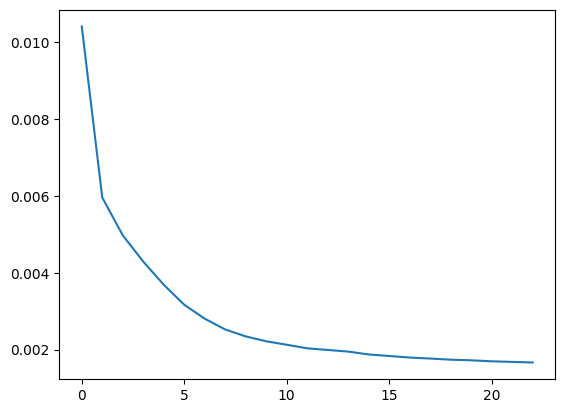

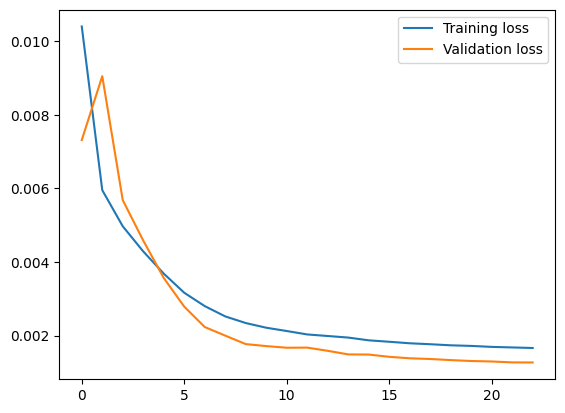

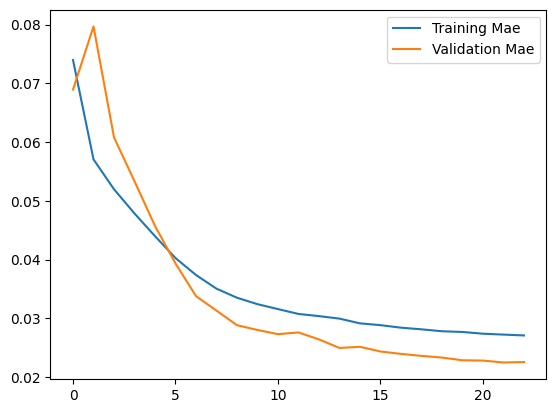

In [26]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 13ms/step


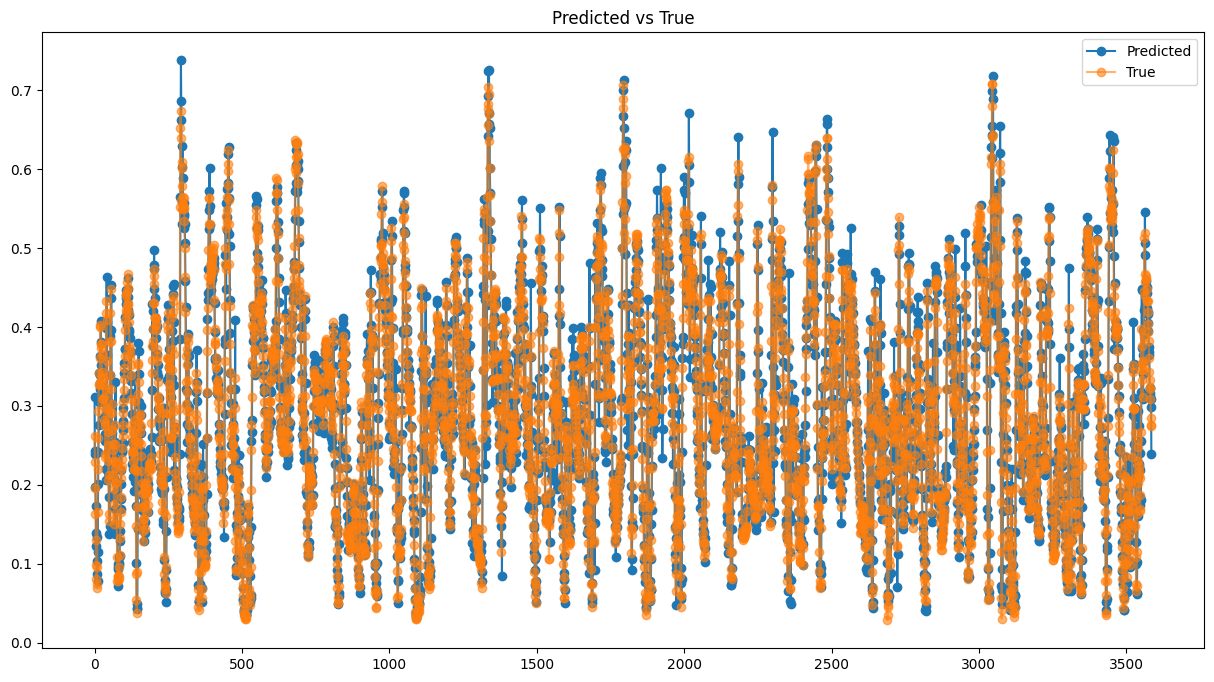

In [27]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [28]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03436596296197054,
 'mse': 0.049409621647766626,
 'rmse': 0.002441310711375448}

# Entrenamiento Stacked LSTM con dropout

In [29]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [30]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_dropout_balanceado.h5')

Epoch 1/50
170/170 [==============================] - 15s 46ms/step - loss: 0.0199 - mae: 0.1045 - mse: 0.0199 - val_loss: 0.0071 - val_mae: 0.0642 - val_mse: 0.0071
Epoch 2/50
170/170 [==============================] - 7s 44ms/step - loss: 0.0115 - mae: 0.0773 - mse: 0.0115 - val_loss: 0.0064 - val_mae: 0.0638 - val_mse: 0.0064
Epoch 3/50
170/170 [==============================] - 8s 45ms/step - loss: 0.0092 - mae: 0.0704 - mse: 0.0092 - val_loss: 0.0056 - val_mae: 0.0566 - val_mse: 0.0056
Epoch 4/50
170/170 [==============================] - 7s 43ms/step - loss: 0.0077 - mae: 0.0638 - mse: 0.0077 - val_loss: 0.0044 - val_mae: 0.0503 - val_mse: 0.0044
Epoch 5/50
170/170 [==============================] - 7s 39ms/step - loss: 0.0068 - mae: 0.0594 - mse: 0.0068 - val_loss: 0.0040 - val_mae: 0.0473 - val_mse: 0.0040
Epoch 6/50
170/170 [==============================] - 7s 43ms/step - loss: 0.0061 - mae: 0.0562 - mse: 0.0061 - val_loss: 0.0030 - val_mae: 0.0388 - val_mse: 0.0030
Epoch 7/5

113/113 [==============================] - 3s 16ms/step - loss: 0.0035 - mae: 0.0453 - mse: 0.0035
test loss, test acc: [0.003516650293022394, 0.045299872756004333, 0.003516650293022394]


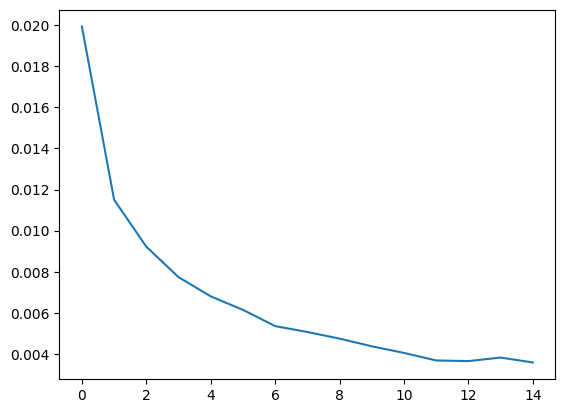

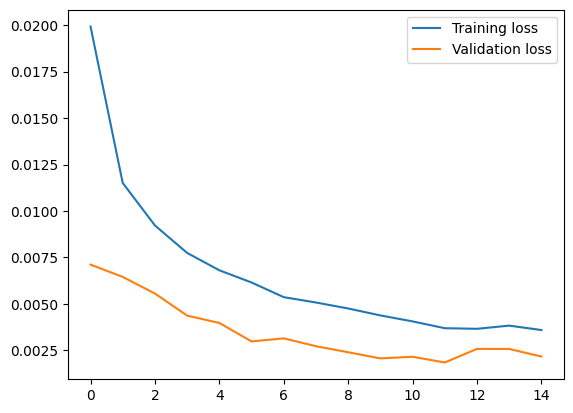

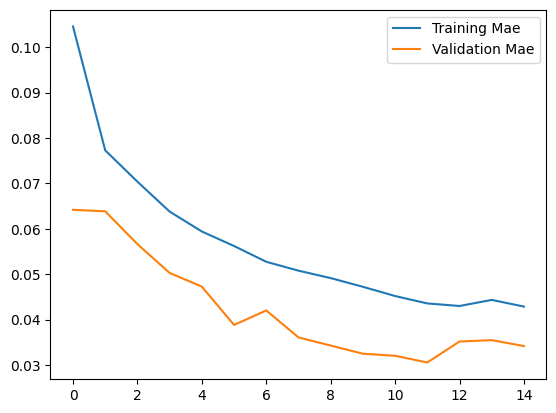

In [31]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 17ms/step


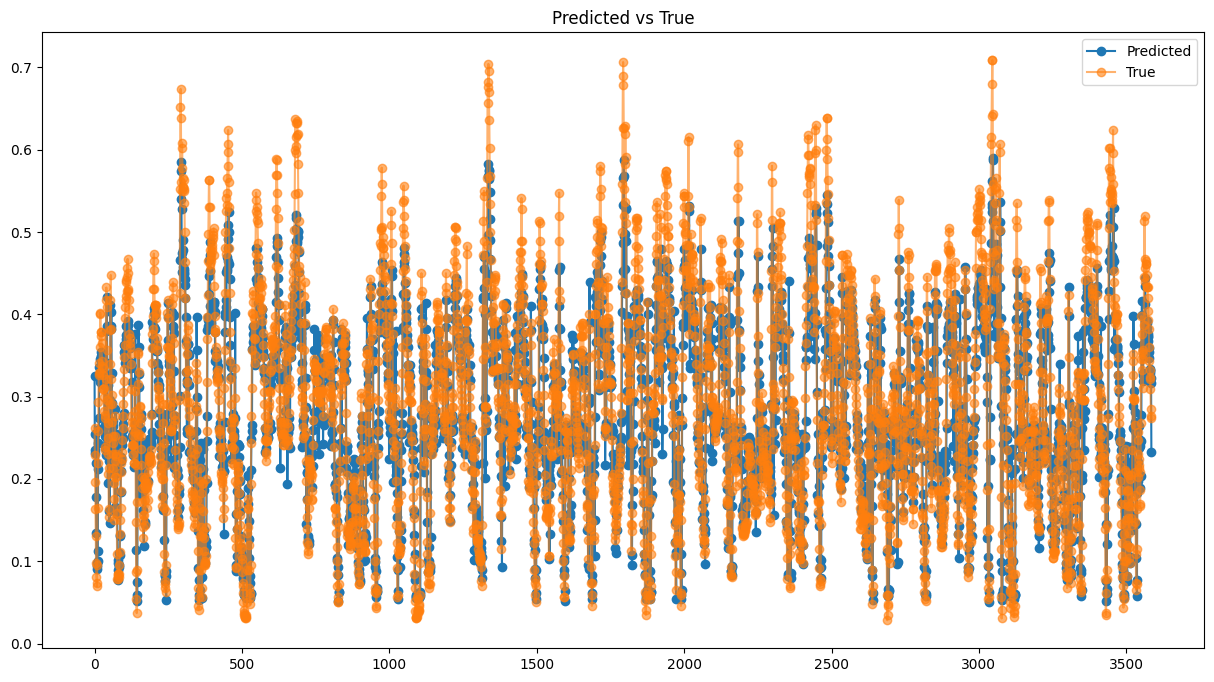

In [32]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [33]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04529987452468217,
 'mse': 0.059301350514350676,
 'rmse': 0.0035166501728258795}

# Entrenamiento Stacked LSTM sin dropout

In [34]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [35]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_NO_dropout_balanceado.h5')

Epoch 1/50
170/170 [==============================] - 11s 47ms/step - loss: 0.0136 - mae: 0.0851 - mse: 0.0136 - val_loss: 0.0095 - val_mae: 0.0765 - val_mse: 0.0095
Epoch 2/50
170/170 [==============================] - 6s 38ms/step - loss: 0.0072 - mae: 0.0605 - mse: 0.0072 - val_loss: 0.0085 - val_mae: 0.0751 - val_mse: 0.0085
Epoch 3/50
170/170 [==============================] - 8s 48ms/step - loss: 0.0056 - mae: 0.0528 - mse: 0.0056 - val_loss: 0.0069 - val_mae: 0.0684 - val_mse: 0.0069
Epoch 4/50
170/170 [==============================] - 7s 41ms/step - loss: 0.0044 - mae: 0.0464 - mse: 0.0044 - val_loss: 0.0053 - val_mae: 0.0581 - val_mse: 0.0053
Epoch 5/50
170/170 [==============================] - 7s 39ms/step - loss: 0.0037 - mae: 0.0421 - mse: 0.0037 - val_loss: 0.0040 - val_mae: 0.0491 - val_mse: 0.0040
Epoch 6/50
170/170 [==============================] - 7s 42ms/step - loss: 0.0031 - mae: 0.0388 - mse: 0.0031 - val_loss: 0.0028 - val_mae: 0.0396 - val_mse: 0.0028
Epoch 7/5

113/113 [==============================] - 3s 16ms/step - loss: 0.0027 - mae: 0.0377 - mse: 0.0027
test loss, test acc: [0.0026971413753926754, 0.03769177570939064, 0.0026971413753926754]


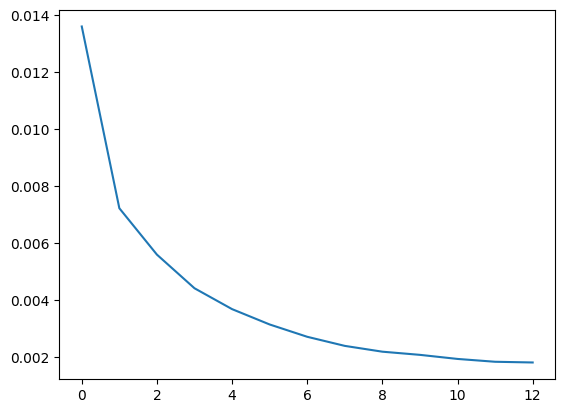

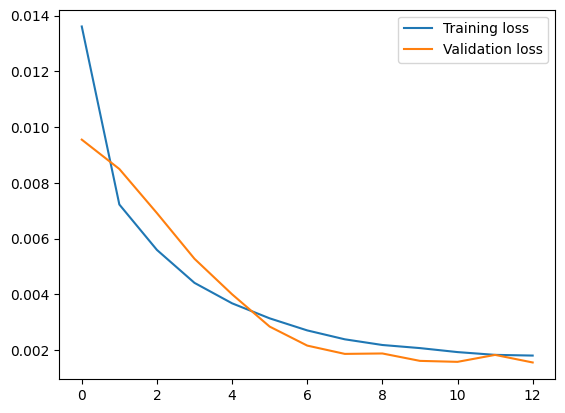

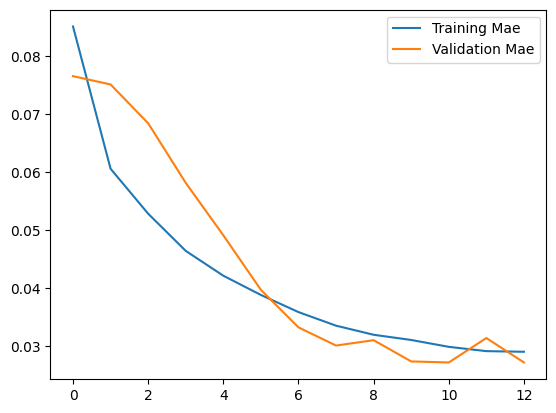

In [36]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 10ms/step


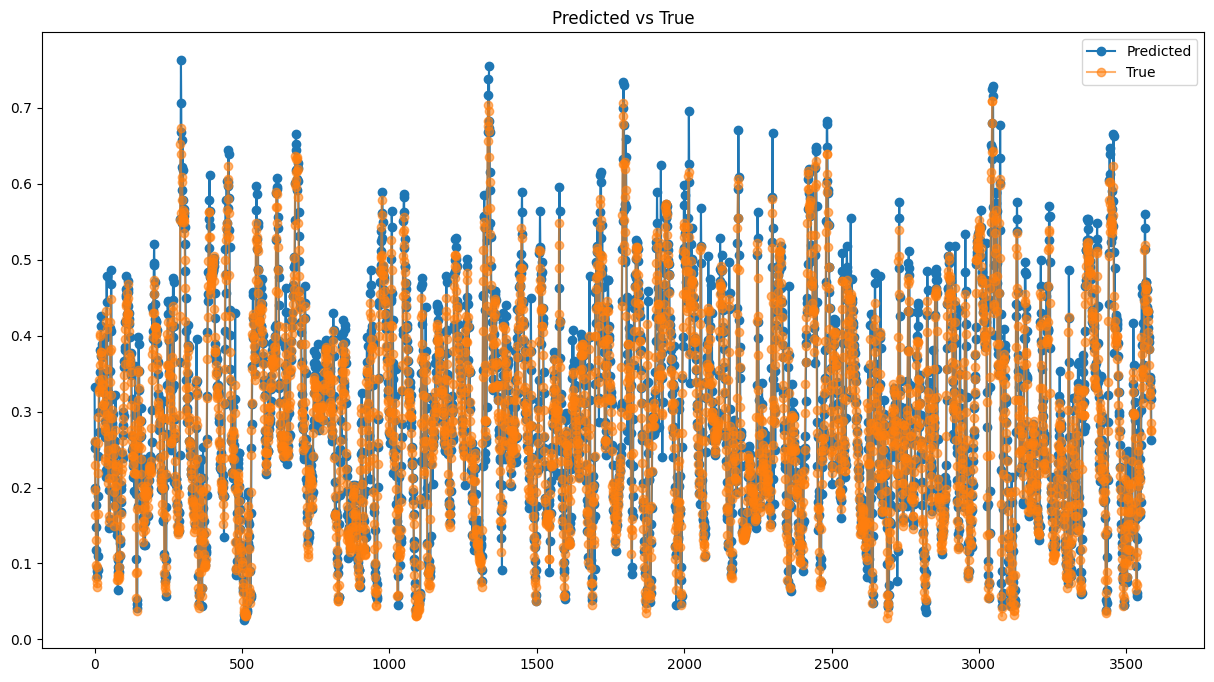

In [37]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [38]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03769178069313655,
 'mse': 0.05193401415437729,
 'rmse': 0.0026971418261870603}

# Entrenamiento Bidirectional LSTM con dropout

In [39]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [40]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_dropout_balanceado.h5')

Epoch 1/50
170/170 [==============================] - 10s 28ms/step - loss: 0.0233 - mae: 0.1121 - mse: 0.0233 - val_loss: 0.0081 - val_mae: 0.0673 - val_mse: 0.0081
Epoch 2/50
170/170 [==============================] - 3s 20ms/step - loss: 0.0112 - mae: 0.0778 - mse: 0.0112 - val_loss: 0.0057 - val_mae: 0.0564 - val_mse: 0.0057
Epoch 3/50
170/170 [==============================] - 4s 26ms/step - loss: 0.0089 - mae: 0.0685 - mse: 0.0089 - val_loss: 0.0053 - val_mae: 0.0561 - val_mse: 0.0053
Epoch 4/50
170/170 [==============================] - 4s 26ms/step - loss: 0.0078 - mae: 0.0643 - mse: 0.0078 - val_loss: 0.0052 - val_mae: 0.0539 - val_mse: 0.0052
Epoch 5/50
170/170 [==============================] - 4s 24ms/step - loss: 0.0068 - mae: 0.0601 - mse: 0.0068 - val_loss: 0.0046 - val_mae: 0.0514 - val_mse: 0.0046
Epoch 6/50
170/170 [==============================] - 4s 23ms/step - loss: 0.0063 - mae: 0.0578 - mse: 0.0063 - val_loss: 0.0048 - val_mae: 0.0516 - val_mse: 0.0048
Epoch 7/5

113/113 [==============================] - 2s 10ms/step - loss: 0.0042 - mae: 0.0478 - mse: 0.0042
test loss, test acc: [0.004227032884955406, 0.04778524860739708, 0.004227032884955406]


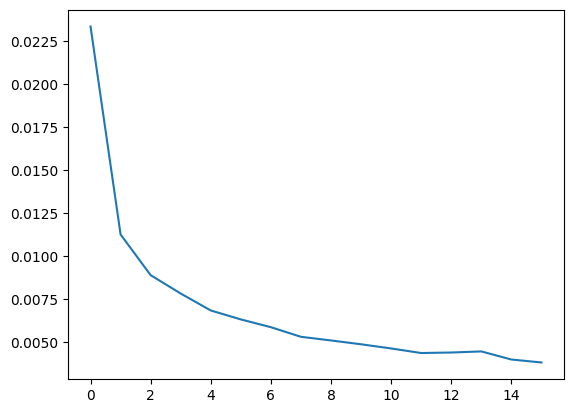

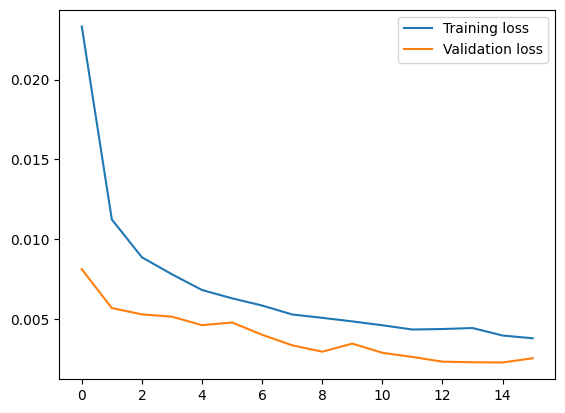

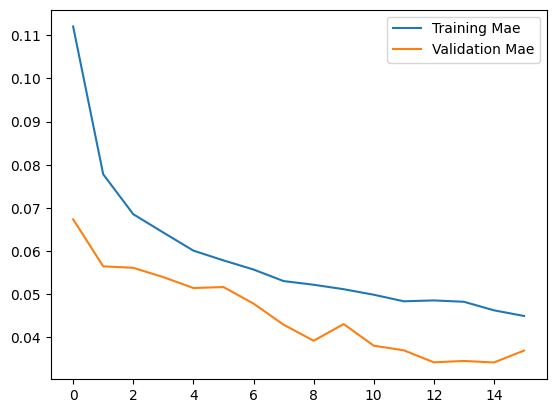

In [41]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 6ms/step


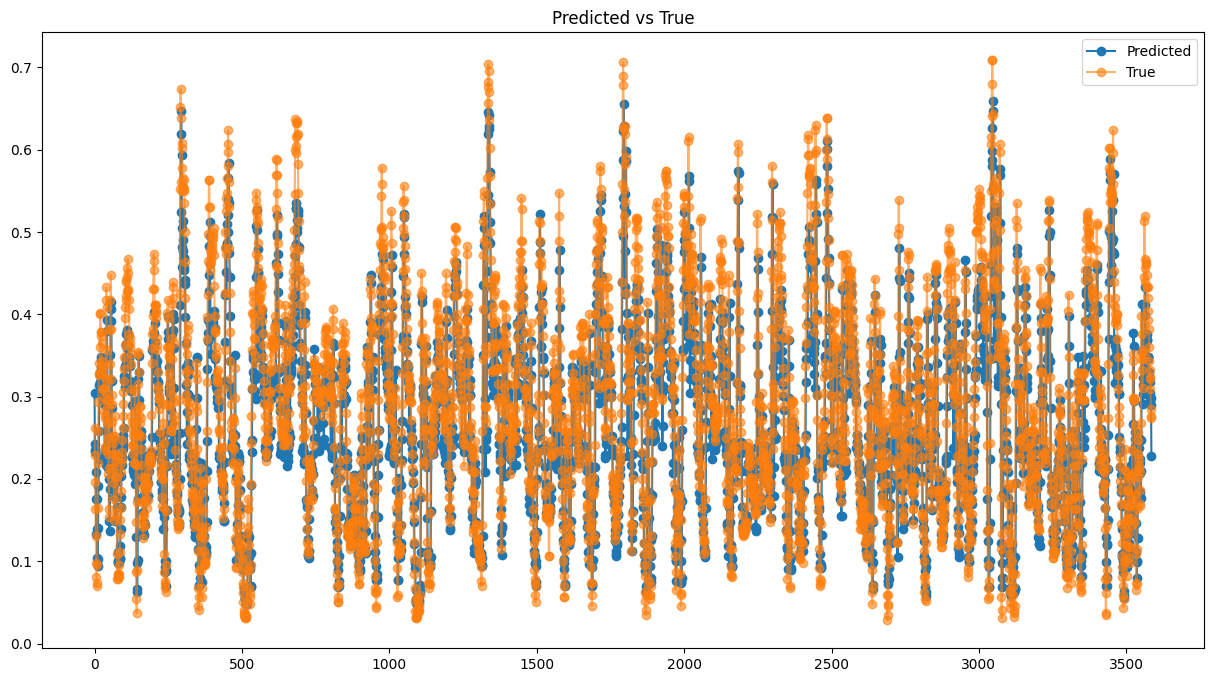

In [42]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [43]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04778524186250963,
 'mse': 0.06501563389541395,
 'rmse': 0.0042270326508225}

# Entrenamiento Bidirectional LSTM sin dropout

In [44]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [45]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_NO_dropout_balanceado.h5')

Epoch 1/50
170/170 [==============================] - 9s 28ms/step - loss: 0.0125 - mae: 0.0796 - mse: 0.0125 - val_loss: 0.0052 - val_mae: 0.0536 - val_mse: 0.0052
Epoch 2/50
170/170 [==============================] - 4s 24ms/step - loss: 0.0049 - mae: 0.0498 - mse: 0.0049 - val_loss: 0.0053 - val_mae: 0.0559 - val_mse: 0.0053
Epoch 3/50
170/170 [==============================] - 3s 18ms/step - loss: 0.0042 - mae: 0.0454 - mse: 0.0042 - val_loss: 0.0042 - val_mae: 0.0479 - val_mse: 0.0042
Epoch 4/50
170/170 [==============================] - 4s 25ms/step - loss: 0.0036 - mae: 0.0417 - mse: 0.0036 - val_loss: 0.0033 - val_mae: 0.0423 - val_mse: 0.0033
Epoch 5/50
170/170 [==============================] - 4s 24ms/step - loss: 0.0033 - mae: 0.0393 - mse: 0.0033 - val_loss: 0.0027 - val_mae: 0.0374 - val_mse: 0.0027
Epoch 6/50
170/170 [==============================] - 4s 24ms/step - loss: 0.0030 - mae: 0.0373 - mse: 0.0030 - val_loss: 0.0024 - val_mae: 0.0344 - val_mse: 0.0024
Epoch 7/50

113/113 [==============================] - 2s 9ms/step - loss: 0.0026 - mae: 0.0352 - mse: 0.0026
test loss, test acc: [0.002641489263623953, 0.035209812223911285, 0.002641489263623953]


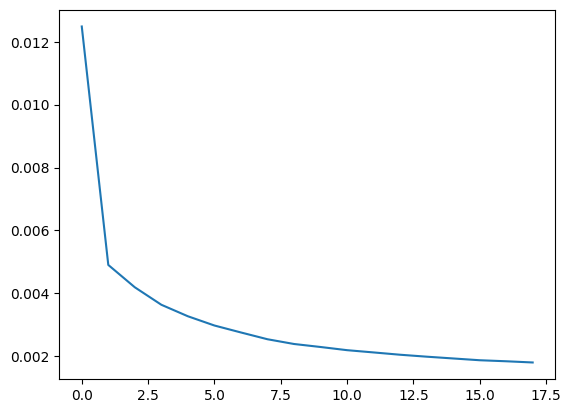

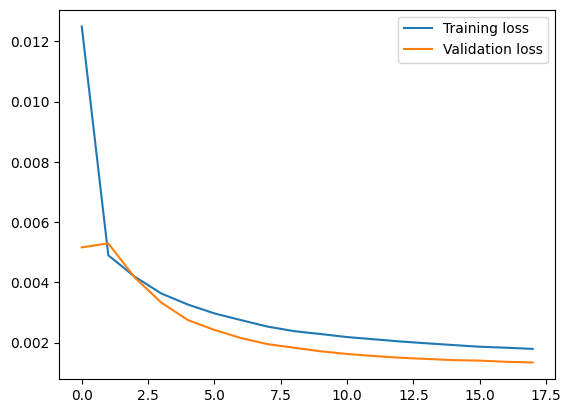

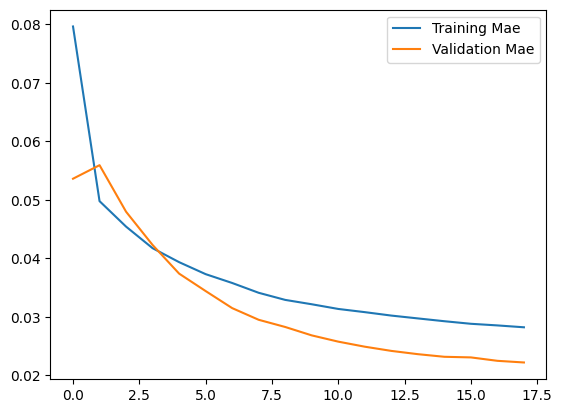

In [46]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 7ms/step


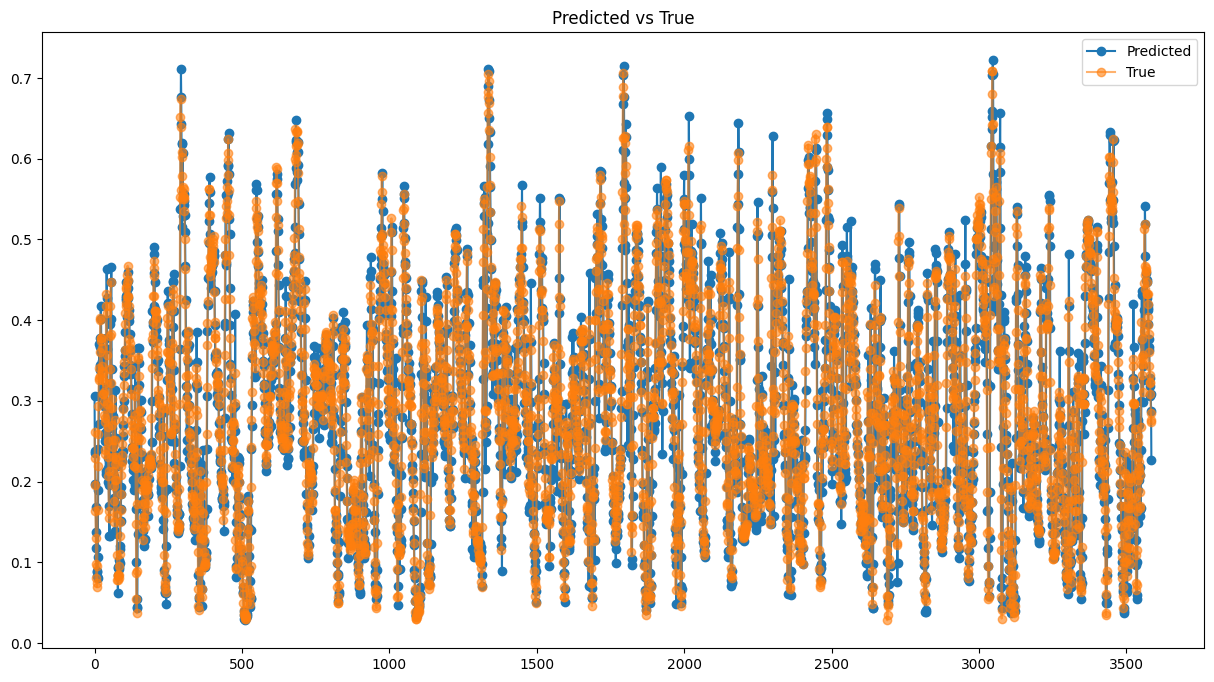

In [47]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [48]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03520980905106575,
 'mse': 0.05139542367972901,
 'rmse': 0.00264148957521885}